In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('conjunto_de_datos_concentradohogar_enigh2022_ns.csv')

In [3]:
df.head()

,folioviv,foliohog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,clase_hog,sexo_jefe,...,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog,smg
0,100005002,1,1001,1,4,3,1,206,3,2,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,15558.3
1,100005003,1,1001,1,4,3,1,206,2,1,...,0.0,0.0,0.0,19565.21,0.0,0.0,0.0,0.0,0.0,15558.3
2,100005004,1,1001,1,4,3,1,206,2,1,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,15558.3
3,100012002,1,1001,1,3,2,2,167,3,1,...,0.0,0.0,0.0,28124.99,0.0,0.0,0.0,0.0,0.0,15558.3
4,100012002,2,1001,1,3,2,2,167,1,1,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,15558.3


In [4]:
df.columns

Index(['folioviv', 'foliohog', 'ubica_geo', 'tam_loc', 'est_socio', 'est_dis',
       'upm', 'factor', 'clase_hog', 'sexo_jefe',
       ...
       'mater_serv', 'material', 'servicio', 'deposito', 'prest_terc',
       'pago_tarje', 'deudas', 'balance', 'otras_erog', 'smg'],
      dtype='object', length=126)

In [5]:
df_relevant = df[['folioviv','ubica_geo','tam_loc','est_socio','est_dis','tot_integ','ing_cor','sueldos','negocio','rentas','bene_gob','gasto_mon','alimentos','ali_dentro','medicinas','percep_tot']]

In [6]:
df_relevant.shape

(90102, 16)

In [7]:
df_sum = df_relevant.groupby(['folioviv','ubica_geo','tam_loc','est_socio','est_dis','tot_integ']).sum().reset_index()

In [40]:
df_avg = df_relevant.groupby(['folioviv','ubica_geo','tam_loc','est_socio','est_dis','tot_integ']).mean().reset_index()

In [38]:
pd.options.display.float_format = '{:,.2f}'.format
df_avg['ing_cor'].describe()

count      89,738.00
mean       61,576.12
std        78,437.20
min             0.00
25%        28,428.06
50%        46,131.13
75%        74,481.38
max     7,153,770.46
Name: ing_cor, dtype: float64

In [8]:
df_count = df_relevant.groupby(['folioviv','ubica_geo','tam_loc','est_socio','est_dis','tot_integ']).count().reset_index()

In [9]:
df_count[df_count['medicinas'] == 4]

,folioviv,ubica_geo,tam_loc,est_socio,est_dis,tot_integ,ing_cor,sueldos,negocio,rentas,bene_gob,gasto_mon,alimentos,ali_dentro,medicinas,percep_tot
8981,360082309,3002,4,1,42,1,4,4,4,4,4,4,4,4,4,4
8991,360082719,3002,4,1,42,1,4,4,4,4,4,4,4,4,4,4
10197,400702002,4003,1,2,49,1,4,4,4,4,4,4,4,4,4,4
59866,2200167403,22014,1,3,355,1,4,4,4,4,4,4,4,4,4,4
59883,2200214501,22014,1,4,356,1,4,4,4,4,4,4,4,4,4,4
60162,2200676605,22014,1,4,356,1,4,4,4,4,4,4,4,4,4,4
60545,2201417506,22014,1,3,355,1,4,4,4,4,4,4,4,4,4,4


In [10]:
df_count.shape

(89738, 16)

In [11]:
df_sum['est_socio'].value_counts()

est_socio
2    47142
1    21043
3    15701
4     5852
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

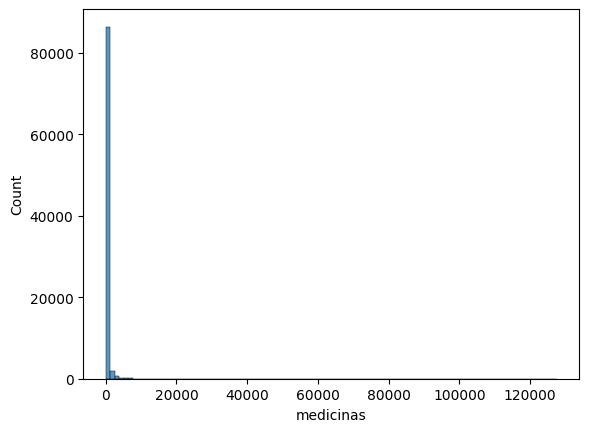

In [13]:
sns.histplot(df_sum['medicinas'], bins=100)
plt.show()

In [14]:
df_medicinas = df_sum[df_sum['medicinas'] > 0]

In [15]:
df_medicinas['medicinas'].describe()

count     34768.000000
mean        554.316477
std        2038.769246
min           2.930000
25%          68.470000
50%         156.510000
75%         410.860000
max      127464.420000
Name: medicinas, dtype: float64

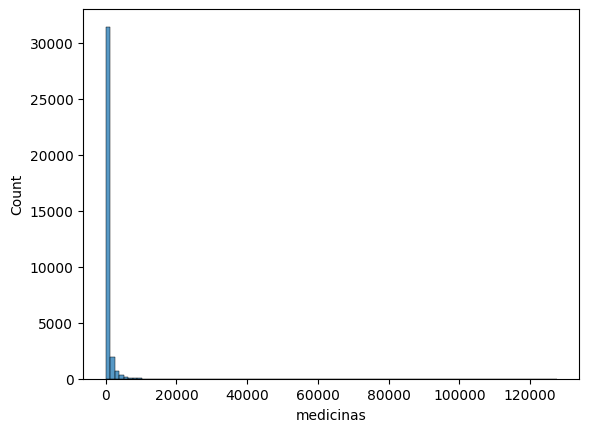

In [16]:
sns.histplot(df_medicinas['medicinas'], bins=100)
plt.show()

In [17]:
import scipy.stats as stats
import statsmodels.api as sm

In [18]:
shape, loc, scale = stats.lognorm.fit(df_medicinas['medicinas'], floc=0)

In [19]:
print(f"Shape: {shape}, Location: {loc}, Scale: {scale}")

Shape: 1.3496448504472962, Location: 0, Scale: 182.88033842261027


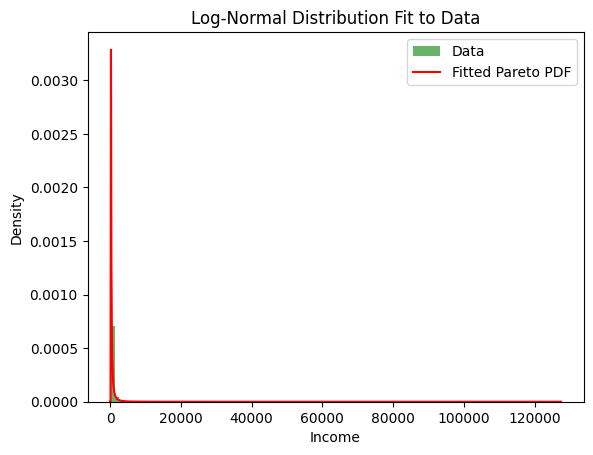

In [20]:
x = np.linspace(min(df_medicinas['medicinas'].to_numpy()), max(df_medicinas['medicinas'].to_numpy()), 1000)
pdf_fitted = stats.pareto.pdf(x, shape, loc, scale)

plt.hist(df_medicinas['medicinas'], bins=100, density=True, alpha=0.6, color='g', label='Data')
plt.plot(x, pdf_fitted, 'r-', label='Fitted Pareto PDF')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend(loc='best')
plt.title('Log-Normal Distribution Fit to Data')
plt.show()

In [21]:
D, p_value = stats.kstest(df_medicinas['medicinas'], 'pareto', args=(shape, loc, scale))
print(f"K-S Test Statistic: {D}")
print(f"P-Value: {p_value}")

K-S Test Statistic: 0.5417337781868384
P-Value: 0.0


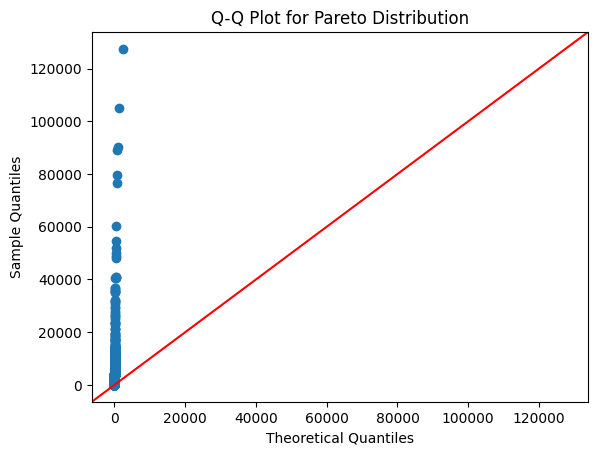

In [22]:
sm.qqplot(df_medicinas['medicinas'].to_numpy(), dist=stats.pareto, distargs=(shape,), line='45')
plt.title('Q-Q Plot for Pareto Distribution')
plt.show()

Gamma K-S Statistic: 0.17142548760699816, P-Value: 0.0


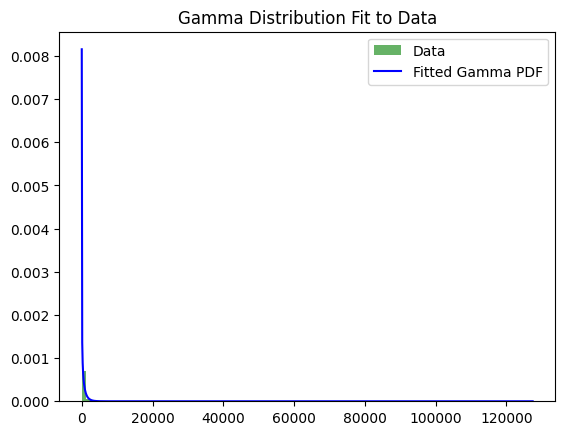

In [23]:
shape_gamma, loc_gamma, scale_gamma = stats.gamma.fit(df_medicinas['medicinas'], floc=0)

# Perform K-S test for Gamma
D_gamma, p_value_gamma = stats.kstest(df_medicinas['medicinas'], 'gamma', args=(shape_gamma, loc_gamma, scale_gamma))
print(f"Gamma K-S Statistic: {D_gamma}, P-Value: {p_value_gamma}")

# Plot PDF comparison
x = np.linspace(min(df_medicinas['medicinas']), max(df_medicinas['medicinas']), 1000)
pdf_gamma = stats.gamma.pdf(x, shape_gamma, loc_gamma, scale_gamma)
plt.hist(df_medicinas['medicinas'], bins=100, density=True, alpha=0.6, color='g', label='Data')
plt.plot(x, pdf_gamma, 'b-', label='Fitted Gamma PDF')
plt.legend(loc='best')
plt.title('Gamma Distribution Fit to Data')
plt.show()

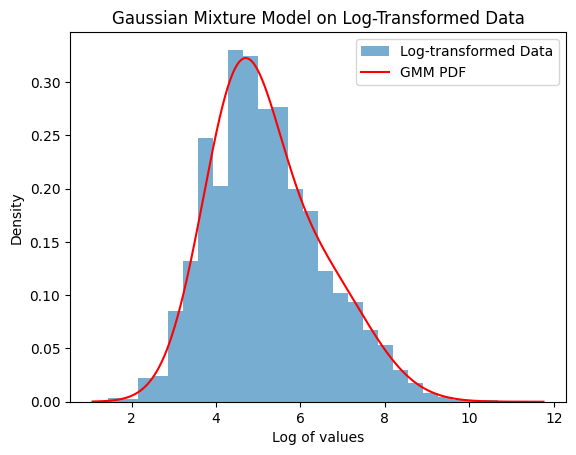

In [24]:
from sklearn.mixture import GaussianMixture

# Log-transform the data (ensure no negative values)
data = np.log(df_medicinas['medicinas'].to_numpy())  # Take log of positive data only

# Fit a GMM with two components (this can be increased)
gmm = GaussianMixture(n_components=2)
gmm.fit(data.reshape(-1, 1))

# Generate the predicted data distribution
x = np.linspace(min(data), max(data), 1000)
log_pdf_gmm = np.exp(gmm.score_samples(x.reshape(-1, 1)))

# Plot the results
plt.hist(data, bins=30, density=True, alpha=0.6, label='Log-transformed Data')
plt.plot(x, log_pdf_gmm, 'r-', label='GMM PDF')
plt.xlabel('Log of values')
plt.ylabel('Density')
plt.legend(loc='best')
plt.title('Gaussian Mixture Model on Log-Transformed Data')
plt.show()

In [25]:
print(f"AIC: {gmm.aic(data.reshape(-1, 1))}")
print(f"BIC: {gmm.bic(data.reshape(-1, 1))}")


AIC: 117803.27148483769
BIC: 117845.55374835017


In [26]:
df_medicinas['sueldos']

6        24652.17
8        76304.34
11           0.00
12       44021.73
13       11739.13
           ...   
89726        0.00
89729        0.00
89730    22426.22
89731    12786.88
89733    25826.08
Name: sueldos, Length: 34768, dtype: float64

In [27]:
df_medicinas['gasto_por_persona'] = df_medicinas['medicinas'] / df_medicinas['tot_integ']
df_medicinas['ingreso_por_persona'] = df_medicinas['ing_cor'] / df_medicinas['tot_integ']

/tmp/ipykernel_979/423108753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medicinas['gasto_por_persona'] = df_medicinas['medicinas'] / df_medicinas['tot_integ']
/tmp/ipykernel_979/423108753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medicinas['ingreso_por_persona'] = df_medicinas['ing_cor'] / df_medicinas['tot_integ']


In [28]:
df_medicinas['gasto_por_persona'].describe()

count    34768.000000
mean       216.444125
std        990.248373
min          0.488333
25%         20.866667
50%         48.912000
75%        146.730000
max      60139.560000
Name: gasto_por_persona, dtype: float64

In [29]:
df_medicinas['ingreso_por_persona'].describe()

count     34768.000000
mean      21573.238450
std       26609.517292
min           0.000000
25%        9212.486806
50%       14803.273333
75%       24779.712750
max      949180.320000
Name: ingreso_por_persona, dtype: float64

In [30]:
df_sum['gasto_por_persona'] = df_sum['medicinas'] / df_sum['tot_integ']
df_sum['ingreso_por_persona'] = df_sum['ing_cor'] / df_sum['tot_integ']

In [31]:
df_sum['ingreso_por_persona'].describe()

count    8.973800e+04
mean     2.188628e+04
std      3.179924e+04
min      0.000000e+00
25%      9.294414e+03
50%      1.508348e+04
75%      2.520831e+04
max      3.098499e+06
Name: ingreso_por_persona, dtype: float64

In [32]:
df_sum['est_socio'].value_counts(normalize=True)

est_socio
2    0.525329
1    0.234494
3    0.174965
4    0.065212
Name: proportion, dtype: float64

In [33]:
df_medicinas['est_socio'].value_counts(normalize=True)

est_socio
2    0.520450
1    0.257162
3    0.157386
4    0.065002
Name: proportion, dtype: float64

In [46]:
agee = pd.read_csv('AGEEML_20249151733738.csv', encoding='latin1')

In [136]:
df_medicinas

,folioviv,ubica_geo,tam_loc,est_socio,est_dis,tot_integ,ing_cor,sueldos,negocio,rentas,bene_gob,gasto_mon,alimentos,ali_dentro,medicinas,percep_tot,gasto_por_persona,ingreso_por_persona
6,100012006,1001,1,3,2,4,60260.85,24652.17,0.00,0.00,0.00,79134.46,17357.02,11828.46,978.26,0.00,244.565000,15065.212500
8,100019302,1001,1,4,3,3,158399.43,76304.34,0.00,16007.28,0.00,48187.73,17318.42,14747.00,978.26,0.00,326.086667,52799.810000
11,100023301,1001,1,3,2,1,85698.79,0.00,0.00,1173.91,2445.65,33152.12,14129.93,14129.93,293.46,0.00,293.460000,85698.790000
12,100023302,1001,1,3,2,4,138427.04,44021.73,0.00,9391.30,0.00,38555.93,29044.12,16829.85,97.82,1928.57,24.455000,34606.760000
13,100023303,1001,1,3,2,3,111300.83,11739.13,0.00,14673.91,0.00,86114.71,32399.73,28542.59,195.65,0.00,65.216667,37100.276667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89726,3260797424,32046,4,2,560,1,11809.15,0.00,1076.08,0.00,3678.26,12592.49,6904.24,3047.11,352.17,2009.32,352.170000,11809.150000
89729,3260797703,32046,4,2,560,1,38301.78,0.00,12498.68,2459.01,0.00,24484.25,7045.63,4859.92,134.99,4114.41,134.990000,38301.780000
89730,3260797704,32046,4,2,560,5,45456.86,22426.22,0.00,15051.63,0.00,30983.22,23091.19,19234.05,107.60,486.32,21.520000,9091.372000
89731,3260797705,32046,4,2,560,3,86922.70,12786.88,8262.29,0.00,0.00,84215.62,22936.88,19722.60,3913.04,45436.20,1304.346667,28974.233333


In [143]:
agee

,CVEGEO,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,LATITUD,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
0,10010001,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,U,"21°52´47.362N""","102°17´45.768W""",21.879822,-102.296046,1878,F13D19,863893,419168,444725,246259
1,10010094,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,94,Granja Adelita,R,"21°52´18.749N""","102°22´24.710W""",21.871874,-102.373530,1901,F13D18,5,*,*,2
2,10010096,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,96,Agua Azul,R,"21°53´01.522N""","102°21´25.639W""",21.883756,-102.357122,1861,F13D18,41,24,17,12
3,10010100,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,100,Rancho Alegre,R,"21°51´16.556N""","102°22´21.884W""",21.854599,-102.372745,1879,F13D18,0,0,0,0
4,10010102,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,102,Los Arbolitos [Rancho],R,"21°46´48.650N""","102°21´26.261W""",21.780180,-102.357295,1861,F13D18,8,*,*,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298751,320580039,NaN,32,Zacatecas,Zac.,58,Santa María de la Paz,39,San Isidro,R,"21°29´11.130N""","103°20´14.164W""",21.486425,-103.337267,2036,F13D35,1,*,*,1
298752,320580040,NaN,32,Zacatecas,Zac.,58,Santa María de la Paz,40,San José,R,"21°30´59.539N""","103°27´23.645W""",21.516539,-103.456568,1821,F13D25,0,0,0,0
298753,320580041,NaN,32,Zacatecas,Zac.,58,Santa María de la Paz,41,San Miguel Tepetitlán,R,"21°30´15.168N""","103°20´09.356W""",21.504213,-103.335932,1977,F13D25,97,47,50,31
298754,320580042,NaN,32,Zacatecas,Zac.,58,Santa María de la Paz,42,San Rafael,R,"21°31´39.341N""","103°22´20.134W""",21.527594,-103.372259,2041,F13D25,3,*,*,1


In [47]:
agee_mun = agee[agee['CVE_LOC'] == 1].reset_index(drop=True)

In [48]:
agee_mun[(agee_mun['CVE_ENT'] == 32) & (agee_mun['CVE_MUN'] == 46)]

,CVEGEO,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,LATITUD,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
2463,320460001,NaN,32,Zacatecas,Zac.,46,Tepetongo,1,Tepetongo,U,"22°27´40.553N""","103°08´52.433W""",22.46,-103.15,1918,F13B76,1497,692,805,485


In [147]:
df_medicinas.head()

,folioviv,ubica_geo,tam_loc,est_socio,est_dis,tot_integ,ing_cor,sueldos,negocio,rentas,bene_gob,gasto_mon,alimentos,ali_dentro,medicinas,percep_tot,gasto_por_persona,ingreso_por_persona
6,100012006,1001,1,3,2,4,60260.85,24652.17,0.0,0.00,0.00,79134.46,17357.02,11828.46,978.26,0.00,244.565000,15065.212500
8,100019302,1001,1,4,3,3,158399.43,76304.34,0.0,16007.28,0.00,48187.73,17318.42,14747.00,978.26,0.00,326.086667,52799.810000
11,100023301,1001,1,3,2,1,85698.79,0.00,0.0,1173.91,2445.65,33152.12,14129.93,14129.93,293.46,0.00,293.460000,85698.790000
12,100023302,1001,1,3,2,4,138427.04,44021.73,0.0,9391.30,0.00,38555.93,29044.12,16829.85,97.82,1928.57,24.455000,34606.760000
13,100023303,1001,1,3,2,3,111300.83,11739.13,0.0,14673.91,0.00,86114.71,32399.73,28542.59,195.65,0.00,65.216667,37100.276667


In [155]:
df_medicinas['ubica_geo'] = df_medicinas['ubica_geo'].astype(str)

/tmp/ipykernel_946/722563333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medicinas['ubica_geo'] = df_medicinas['ubica_geo'].astype(str)


In [148]:
agee_mun.head()

,CVEGEO,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,LATITUD,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
0,10010001,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,U,"21°52´47.362N""","102°17´45.768W""",21.879822,-102.296046,1878,F13D19,863893,419168,444725,246259
1,10020001,NaN,1,Aguascalientes,Ags.,2,Asientos,1,Asientos,U,"22°14´17.941N""","102°05´21.390W""",22.238317,-102.089275,2167,F13B89,5248,2544,2704,1263
2,10030001,NaN,1,Aguascalientes,Ags.,3,Calvillo,1,Calvillo,U,"21°50´48.866N""","102°43´07.502W""",21.846907,-102.718750,1634,F13D17,21049,10175,10874,5626
3,10040001,NaN,1,Aguascalientes,Ags.,4,Cosío,1,Cosío,U,"22°21´59.071N""","102°18´00.159W""",22.366409,-102.300044,2005,F13B79,5870,2792,3078,1430
4,10050001,NaN,1,Aguascalientes,Ags.,5,Jesús María,1,Jesús María,U,"21°57´40.582N""","102°20´36.299W""",21.961273,-102.343416,1877,F13D18,63805,31399,32406,16023


In [166]:
agee_mun['CVEGEO'] = agee_mun['CVEGEO'].astype(str)

In [170]:
def match_on_A_length(row, df2):
    len_A = len(row['ubica_geo'])
    return df2['CVEGEO'].apply(lambda x: x[:len_A] == row['ubica_geo'])

In [173]:
merged_data = []

In [174]:
for _, row in df_medicinas.iterrows():
    # Filter df2 where the first len(A) characters of B match the entire string in A
    matching_rows = agee_mun[match_on_A_length(row, agee_mun)].copy()
    
    # If there are matches, create the merged result and append to the merged_data list
    if not matching_rows.empty:
        merged_result = pd.concat([pd.DataFrame([row] * len(matching_rows)).reset_index(drop=True), matching_rows.reset_index(drop=True)], axis=1)
        merged_data.append(merged_result)

if merged_data:
    merged_df = pd.concat(merged_data, ignore_index=True)
    print(merged_df)
else:
    print("No matching rows found.")


         folioviv ubica_geo  tam_loc  est_socio  est_dis  tot_integ   ing_cor  \
0       100012006      1001        1          3        2          4  60260.85   
1       100012006      1001        1          3        2          4  60260.85   
2       100012006      1001        1          3        2          4  60260.85   
3       100012006      1001        1          3        2          4  60260.85   
4       100012006      1001        1          3        2          4  60260.85   
...           ...       ...      ...        ...      ...        ...       ...   
59704  3260797424     32046        4          2      560          1  11809.15   
59705  3260797703     32046        4          2      560          1  38301.78   
59706  3260797704     32046        4          2      560          5  45456.86   
59707  3260797705     32046        4          2      560          3  86922.70   
59708  3260797907     32046        4          2      560          3  32925.44   

        sueldos   negocio  

In [180]:
df_medicinas.head()

,folioviv,ubica_geo,tam_loc,est_socio,est_dis,tot_integ,ing_cor,sueldos,negocio,rentas,bene_gob,gasto_mon,alimentos,ali_dentro,medicinas,percep_tot,gasto_por_persona,ingreso_por_persona
6,100012006,1001,1,3,2,4,60260.85,24652.17,0.0,0.00,0.00,79134.46,17357.02,11828.46,978.26,0.00,244.565000,15065.212500
8,100019302,1001,1,4,3,3,158399.43,76304.34,0.0,16007.28,0.00,48187.73,17318.42,14747.00,978.26,0.00,326.086667,52799.810000
11,100023301,1001,1,3,2,1,85698.79,0.00,0.0,1173.91,2445.65,33152.12,14129.93,14129.93,293.46,0.00,293.460000,85698.790000
12,100023302,1001,1,3,2,4,138427.04,44021.73,0.0,9391.30,0.00,38555.93,29044.12,16829.85,97.82,1928.57,24.455000,34606.760000
13,100023303,1001,1,3,2,3,111300.83,11739.13,0.0,14673.91,0.00,86114.71,32399.73,28542.59,195.65,0.00,65.216667,37100.276667


In [193]:
df_medicinas['entidad'] = df_medicinas['ubica_geo'].apply(lambda x: x[:2])

/tmp/ipykernel_946/516992070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medicinas['entidad'] = df_medicinas['ubica_geo'].apply(lambda x: x[:2])


In [194]:
df_medicinas['municipio'] = df_medicinas['ubica_geo'].apply(lambda x: x[2:5])

/tmp/ipykernel_946/4111252547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medicinas['municipio'] = df_medicinas['ubica_geo'].apply(lambda x: x[2:5])


In [197]:
agee_mun.head(
)

,CVEGEO,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,...,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS,CVEGEO_first_N
0,10010001,NaN,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,U,...,"102°17´45.768W""",21.879822,-102.296046,1878,F13D19,863893,419168,444725,246259,10010
1,10020001,NaN,1,Aguascalientes,Ags.,2,Asientos,1,Asientos,U,...,"102°05´21.390W""",22.238317,-102.089275,2167,F13B89,5248,2544,2704,1263,10020
2,10030001,NaN,1,Aguascalientes,Ags.,3,Calvillo,1,Calvillo,U,...,"102°43´07.502W""",21.846907,-102.718750,1634,F13D17,21049,10175,10874,5626,10030
3,10040001,NaN,1,Aguascalientes,Ags.,4,Cosío,1,Cosío,U,...,"102°18´00.159W""",22.366409,-102.300044,2005,F13B79,5870,2792,3078,1430,10040
4,10050001,NaN,1,Aguascalientes,Ags.,5,Jesús María,1,Jesús María,U,...,"102°20´36.299W""",21.961273,-102.343416,1877,F13D18,63805,31399,32406,16023,10050


In [41]:
df_avg['ubica_geo'] = df_avg['ubica_geo'].astype(str)

In [42]:
df_avg['entidad'] = df_avg['ubica_geo'].apply(lambda x: x[:2])
df_avg['municipio'] = df_avg['ubica_geo'].apply(lambda x: x[2:5])

In [44]:
df_avg['entidad'].shape

(89738,)

In [49]:
agee_mun[agee_mun['CVE_ENT'] == 70]

,CVEGEO,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,LATITUD,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS


In [199]:
df_medicinas['municipio'] = df_medicinas['municipio'].str.lstrip('0')

/tmp/ipykernel_946/2211405470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medicinas['municipio'] = df_medicinas['municipio'].str.lstrip('0')


In [54]:
df_avg['ubica_geo'] = df_avg['ubica_geo'].str.zfill(5)

In [55]:
df_avg['entidad'] = df_avg['ubica_geo'].apply(lambda x: x[:2])
df_avg['municipio'] = df_avg['ubica_geo'].apply(lambda x: x[2:5])

In [56]:
agee_mun.head()

,CVEGEO,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,LATITUD,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
0,10010001,NaN,01,Aguascalientes,Ags.,001,Aguascalientes,1,Aguascalientes,U,"21°52´47.362N""","102°17´45.768W""",21.88,-102.30,1878,F13D19,863893,419168,444725,246259
1,10020001,NaN,01,Aguascalientes,Ags.,002,Asientos,1,Asientos,U,"22°14´17.941N""","102°05´21.390W""",22.24,-102.09,2167,F13B89,5248,2544,2704,1263
2,10030001,NaN,01,Aguascalientes,Ags.,003,Calvillo,1,Calvillo,U,"21°50´48.866N""","102°43´07.502W""",21.85,-102.72,1634,F13D17,21049,10175,10874,5626
3,10040001,NaN,01,Aguascalientes,Ags.,004,Cosío,1,Cosío,U,"22°21´59.071N""","102°18´00.159W""",22.37,-102.30,2005,F13B79,5870,2792,3078,1430
4,10050001,NaN,01,Aguascalientes,Ags.,005,Jesús María,1,Jesús María,U,"21°57´40.582N""","102°20´36.299W""",21.96,-102.34,1877,F13D18,63805,31399,32406,16023


In [57]:
agee_mun['CVE_ENT'] = agee_mun['CVE_ENT'].astype(str)
agee_mun['CVE_MUN'] = agee_mun['CVE_MUN'].astype(str)

In [58]:
agee_mun['CVE_ENT'] = agee_mun['CVE_ENT'].str.zfill(2)
agee_mun['CVE_MUN'] = agee_mun['CVE_MUN'].str.zfill(3)

In [241]:
df_sum.shape

(89738, 20)

In [59]:
joined_df = pd.merge(df_avg, agee_mun, left_on=['entidad', 'municipio'], right_on=['CVE_ENT', 'CVE_MUN'], how='left')

In [61]:
joined_df.head()

,folioviv,ubica_geo,tam_loc,est_socio,est_dis,tot_integ,ing_cor,sueldos,negocio,rentas,...,LATITUD,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
0,100005002,01001,1,4,3,3,"56,123.75","33,749.99",0.00,0.00,...,"21°52´47.362N""","102°17´45.768W""",21.88,-102.30,1878,F13D19,863893,419168,444725,246259
1,100005003,01001,1,4,3,2,"108,048.87","61,630.42",0.00,"32,282.60",...,"21°52´47.362N""","102°17´45.768W""",21.88,-102.30,1878,F13D19,863893,419168,444725,246259
2,100005004,01001,1,4,3,3,"133,852.88","41,086.95","41,478.26","11,739.13",...,"21°52´47.362N""","102°17´45.768W""",21.88,-102.30,1878,F13D19,863893,419168,444725,246259
3,100012002,01001,1,3,2,1,"24,211.95","17,364.13",0.00,0.00,...,"21°52´47.362N""","102°17´45.768W""",21.88,-102.30,1878,F13D19,863893,419168,444725,246259
4,100012002,01001,1,3,2,4,"105,054.15",0.00,0.00,0.00,...,"21°52´47.362N""","102°17´45.768W""",21.88,-102.30,1878,F13D19,863893,419168,444725,246259


In [63]:
joined_df['ingreso_por_persona'] = joined_df['ing_cor'] / joined_df['tot_integ']
joined_df['medicina_por_persona'] = joined_df['medicinas'] / joined_df['tot_integ']

In [65]:
joined_df['ing_cor'].describe()

count      89,738.00
mean       61,576.12
std        78,437.20
min             0.00
25%        28,428.06
50%        46,131.13
75%        74,481.38
max     7,153,770.46
Name: ing_cor, dtype: float64

In [66]:
joined_df['tot_integ'].value_counts(normalize=True)

tot_integ
4    0.21
2    0.21
3    0.20
5    0.13
1    0.13
6    0.06
7    0.03
8    0.01
9    0.01
10   0.00
11   0.00
12   0.00
13   0.00
14   0.00
15   0.00
16   0.00
17   0.00
18   0.00
19   0.00
Name: proportion, dtype: float64

In [64]:
joined_df['ingreso_por_persona'].describe()

count      89,738.00
mean       21,793.70
std        31,643.49
min             0.00
25%         9,281.71
50%        15,044.31
75%        25,131.14
max     3,098,499.46
Name: ingreso_por_persona, dtype: float64

In [74]:
joined_df[joined_df['medicinas']>0]['medicinas'].describe()

count    34,768.00
mean        553.14
std       2,038.18
min           2.93
25%          68.47
50%         156.51
75%         410.86
max     127,464.42
Name: medicinas, dtype: float64

In [78]:
joined_df['ingreso_por_persona_mensual'] = joined_df['ingreso_por_persona'] /3
joined_df['medicina_por_persona_mensual'] = joined_df['medicina_por_persona'] /3

In [80]:
joined_df.to_csv('joined_df.csv', index=False)

In [90]:
import re

def dms_to_dd(dms):
    # Adjust regex to allow for variations in symbols (including right single quote `´`)
    dms_pattern = re.match(r"(\d+)[°ºd\s](\d+)[\'′´\s](\d+(\.\d+)?)[\"\“”]?\s?([NSEW])", dms)

    if dms_pattern is None:
        raise ValueError(f"Invalid DMS coordinate format: {dms}")

    degrees = int(dms_pattern.group(1))
    minutes = int(dms_pattern.group(2))
    seconds = float(dms_pattern.group(3))
    direction = dms_pattern.group(5)

    # Convert to decimal degrees
    dd = degrees + minutes / 60 + seconds / 3600

    # If direction is South or West, make it negative
    if direction in ['S', 'W']:
        dd = -dd

    return dd

In [91]:
joined_df['latitude'] = joined_df['LATITUD'].apply(dms_to_dd)
joined_df['longitude'] = joined_df['LONGITUD'].apply(dms_to_dd)

In [94]:
joined_df.columns

Index(['folioviv', 'ubica_geo', 'tam_loc', 'est_socio', 'est_dis', 'tot_integ',
       'ing_cor', 'sueldos', 'negocio', 'rentas', 'bene_gob', 'gasto_mon',
       'alimentos', 'ali_dentro', 'medicinas', 'percep_tot', 'entidad',
       'municipio', 'CVEGEO', 'Estatus', 'CVE_ENT', 'NOM_ENT', 'NOM_ABR',
       'CVE_MUN', 'NOM_MUN', 'CVE_LOC', 'NOM_LOC', 'AMBITO', 'LATITUD',
       'LONGITUD', 'LAT_DECIMAL', 'LON_DECIMAL', 'ALTITUD', 'CVE_CARTA',
       'POB_TOTAL', 'POB_MASCULINA', 'POB_FEMENINA',
       'TOTAL DE VIVIENDAS HABITADAS', 'ingreso_por_persona',
       'medicina_por_persona', 'ingreso_por_persona_mensual',
       'medicina_por_persona_mensual', 'latitude', 'longitude'],
      dtype='object')

In [97]:
import geopandas as gpd
from shapely.geometry import Point

In [98]:
joined_df['geometry'] = joined_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

In [99]:
joined_df.to_csv('joined_df.csv', index=False)

In [101]:
gdf = gpd.GeoDataFrame(joined_df, geometry='geometry')

In [102]:
gdf.set_crs(epsg=4326, inplace=True)

,folioviv,ubica_geo,tam_loc,est_socio,est_dis,tot_integ,ing_cor,sueldos,negocio,rentas,...,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS,ingreso_por_persona,medicina_por_persona,ingreso_por_persona_mensual,medicina_por_persona_mensual,latitude,longitude,geometry
0,100005002,01001,1,4,3,3,"56,123.75","33,749.99",0.00,0.00,...,419168,444725,246259,"18,707.92",0.00,"6,235.97",0.00,21.88,-102.30,POINT (-102.29605 21.87982)
1,100005003,01001,1,4,3,2,"108,048.87","61,630.42",0.00,"32,282.60",...,419168,444725,246259,"54,024.43",0.00,"18,008.15",0.00,21.88,-102.30,POINT (-102.29605 21.87982)
2,100005004,01001,1,4,3,3,"133,852.88","41,086.95","41,478.26","11,739.13",...,419168,444725,246259,"44,617.63",0.00,"14,872.54",0.00,21.88,-102.30,POINT (-102.29605 21.87982)
3,100012002,01001,1,3,2,1,"24,211.95","17,364.13",0.00,0.00,...,419168,444725,246259,"24,211.95",0.00,"8,070.65",0.00,21.88,-102.30,POINT (-102.29605 21.87982)
4,100012002,01001,1,3,2,4,"105,054.15",0.00,0.00,0.00,...,419168,444725,246259,"26,263.54",0.00,"8,754.51",0.00,21.88,-102.30,POINT (-102.29605 21.87982)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89733,3260797907,32046,4,2,560,3,"32,925.44","25,826.08",0.00,0.00,...,692,805,485,"10,975.15",363.58,"3,658.38",121.19,22.46,-103.15,POINT (-103.1479 22.46126)
89734,3260797908,32046,4,2,560,3,"25,487.04","4,597.81","10,271.73",0.00,...,692,805,485,"8,495.68",0.00,"2,831.89",0.00,22.46,-103.15,POINT (-103.1479 22.46126)
89735,3260797909,32046,4,2,560,4,"27,055.89","26,413.04",0.00,0.00,...,692,805,485,"6,763.97",0.00,"2,254.66",0.00,22.46,-103.15,POINT (-103.1479 22.46126)
89736,3260797910,32046,4,2,560,2,"159,450.69",0.00,"136,709.99",0.00,...,692,805,485,"79,725.35",0.00,"26,575.12",0.00,22.46,-103.15,POINT (-103.1479 22.46126)


In [110]:
from sklearn.neighbors import KernelDensity

In [117]:
import folium
from folium.plugins import HeatMap

In [118]:
heat_data = [[row['latitude'], row['longitude']] for index, row in gdf.iterrows()]

In [119]:
m = folium.Map(location=[23.6345, -102.5528], zoom_start=5)  # Adjust zoom for appropriate scale

In [120]:
HeatMap(heat_data).add_to(m)

In [121]:
m.save("mexico_heatmap.html")

In [122]:
m